# Practical Project - Regression (EGSNicdao)

### Overview

This project presents how linear regression can be used to predict the concentration of an ion using the concentration of other ions. The files used are annual rainwater concentration data (downloaded per year) from the year 2010 to 2019 from Participating East Asian countries incl. the Philippines. Each file contains `Country`, `Name of Site`, `Average Precipitation Amount`, and the average concentration of the mentioned ions. The files are downloaded from this link: https://monitoring.eanet.asia/document/public/index

# Objectives

- To determine if there is a correlation between the concentration of the ions analyzed for rainwater samples
- To determine if the concentration of other ions can be used to predict the concentration of another ion

### Steps to create the regression line

#### Part 1: Pre-processing and EDA

1. Import necessary libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy import stats
from IPython.display import Math, clear_output
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

2. Import dataset

In [79]:
WD_2010 = pd.read_excel('Wet2010Annual.xlsx')
WD_2011 = pd.read_excel('Wet2011Annual.xlsx')
WD_2012 = pd.read_excel('Wet2012Annual.xlsx')
WD_2013 = pd.read_excel('Wet2013Annual.xlsx')
WD_2014 = pd.read_excel('Wet2014Annual.xlsx')
WD_2015 = pd.read_excel('Wet2015Annual.xlsx')
WD_2016 = pd.read_excel('Wet2016Annual.xlsx')
WD_2017 = pd.read_excel('Wet2017Annual.xlsx')
WD_2018 = pd.read_excel('Wet2018Annual.xlsx')
WD_2019 = pd.read_excel('Wet2019Annual.xlsx')

In [3]:
WD_2010.shape

(54, 17)

In [4]:
WD_2011.shape

(53, 17)

In [5]:
WD_2012.shape

(53, 17)

In [6]:
WD_2013.shape

(52, 17)

In [7]:
WD_2014.shape

(55, 17)

In [8]:
WD_2015.shape

(57, 17)

In [9]:
WD_2016.shape

(57, 17)

In [10]:
WD_2017.shape

(57, 17)

In [5]:
WD_2018.shape

(61, 17)

In [12]:
WD_2019.shape

(61, 17)

In [80]:
data = [WD_2010, WD_2011, WD_2012, WD_2013, WD_2014, WD_2015, WD_2016, WD_2017, WD_2018, WD_2019]
WD_data = pd.concat(data, ignore_index=True)

In [4]:
WD_data.shape #54+53+53+52+55+57+57+57+57+61=556

(556, 17)

In [81]:
WD_data.drop('nss-SO42-, µmol/L', axis=1, inplace=True)
WD_data.drop('nss-Ca2+, µmol/L', axis=1, inplace=True)
WD_data.drop('H+, µmol/L', axis=1, inplace=True)
WD_data.drop('Country', axis=1, inplace=True)
WD_data.drop('Name of sites', axis=1, inplace=True)
WD_data.shape

(556, 12)

In [6]:
WD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             556 non-null    int64 
 1   Precip., mm y-1  554 non-null    object
 2   SO42-, µmol/L    554 non-null    object
 3   NO3-, µmol/L     554 non-null    object
 4   Cl-, µmol/L      554 non-null    object
 5   NH4+, µmol/L     554 non-null    object
 6   Na+, µmol/L      554 non-null    object
 7   K+, µmol/L       554 non-null    object
 8   Ca2+, µmol/L     554 non-null    object
 9   Mg2+, µmol/L     554 non-null    object
 10  pH               554 non-null    object
 11  EC, mS/m         554 non-null    object
dtypes: int64(1), object(11)
memory usage: 52.2+ KB


In [7]:
WD_data.describe(include="all")

,Year,"Precip., mm y-1","SO42-, µmol/L","NO3-, µmol/L","Cl-, µmol/L","NH4+, µmol/L","Na+, µmol/L","K+, µmol/L","Ca2+, µmol/L","Mg2+, µmol/L",pH,"EC, mS/m"
count,556.000000,554,554,554,554,554,554,554,554,554,554,554
unique,NaN,535,534,532,534,529,531,531,531,519,537,537
top,NaN,***,***,***,***,***,***,***,***,***,***,***
freq,NaN,16,19,19,19,22,22,22,22,22,16,16
mean,2014.615108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.888197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for column in WD_data:
    WD_data[column] = pd.to_numeric(WD_data[column])

ValueError: Unable to parse string "***" at position 26

In [82]:
for column in WD_data:
    WD_data.drop(WD_data.loc[WD_data[column]=='***'].index, inplace=True)
WD_data.shape

(534, 12)

In [83]:
for column in WD_data:
    WD_data.drop(WD_data.loc[WD_data[column]=='**'].index, inplace=True)
WD_data.shape

(531, 12)

In [10]:
WD_data['NO3-, µmol/L'].unique()

array([8.36680311788856, 77.64356666104904, 74.96067638107071,
       40.96722344909551, 12.207670594981288, 28.969529699570927,
       30.30391269619177, 23.878621432417873, 19.72576902320561,
       17.077410541003694, 29.75807266096227, 2.365605454977034,
       17.938880654680176, 6.3455284801567995, 14.34699762744459,
       9.469956428556989, 17.503945260789912, 18.095789389034273,
       6.510220933803743, 15.058689323227783, 24.23442057583881,
       22.566973284212533, 7.699916842373801, 6.384062695838408,
       3.068480300351523, 15.326914644637855, 49.47111567012271,
       4.400035957105584, 1.4172884077663515, 4.907554859825026,
       21.384086582986857, 27.61236386100146, 4.9632683121034,
       50.46026657218623, 31.35482789881641, 4.285913924090762,
       31.750568614546328, 22.667141088952263, 28.985396207795063,
       8.112860310421286, 20.150691893215775, 22.271497894792944,
       21.901600271002714, 26.755767530273577, 15.350871323672106,
       20.400491226156

In [84]:
WD_data.drop(WD_data.loc[WD_data['NO3-, µmol/L']=='<0.5 '].index, inplace=True)
WD_data.drop(WD_data.loc[WD_data['NO3-, µmol/L']=='<1 '].index, inplace=True)
WD_data.shape

(527, 12)

In [12]:
WD_data['NH4+, µmol/L'].unique()

array([22.62926593802591, 140.67376985514267, 123.89860009195317,
       186.76466856892787, 17.3191382532048, 39.82418636275591,
       42.886194455195394, 24.43621432417878, 22.716351861845656,
       22.995994758653914, 52.2896619441717, 2.83462888719409,
       32.09636693246504, 10.143263034176352, 15.701908604322808,
       10.713248561084773, 14.98125272372742, 11.850359169554954,
       5.884789705494588, 12.20063614502439, 17.759165468125264,
       21.63730888682125, 6.597352350193717, 9.312406730179944,
       5.292378296117672, 19.232262935068054, 4.601325956361157,
       4.047278676367681, 4.894772964029659, 1.9439371357551187,
       54.683690647434744, 34.9920111870342, 14.591193535158673,
       53.08920838464192, 38.24793635228658, 4.650196058079396,
       26.498937428419644, 26.757527834099925, 31.18742445524395,
       17.519002217294897, 18.317006727288284, 34.50808506102436,
       42.71283634447457, 37.838858212971125, 28.121756004815296,
       28.0279558084367

In [85]:
WD_data.drop(WD_data.loc[WD_data['NH4+, µmol/L']=='<0.8 '].index, inplace=True)
WD_data.drop(WD_data.loc[WD_data['NH4+, µmol/L']=='<1  '].index, inplace=True)
WD_data.drop(WD_data.loc[WD_data['NH4+, µmol/L']=='<1 '].index, inplace=True)
WD_data.shape

(524, 12)

In [14]:
WD_data['Mg2+, µmol/L'].unique()

array([0.717468529233312, 8.953564729859204, 5.759770980054836,
       10.987143797123839, 7.174221214133262, 2.0018595283192644,
       1.8942419662739443, 2.567528271405493, 2.8627900701565023,
       2.2257928689484734, 3.0863936035909667, 1.5482075264833763,
       4.433677072981718, 2.1745296147857247, 18.609193811052698,
       28.5686962361842, 12.908977357730102, 37.70751771527807,
       0.8098972704430115, 1.6170929818116335, 48.137310308886796,
       12.051450917255135, 1.5606081310290543, 29.20221927926957,
       24.48636404783234, 2.400938061066114, 0.6983987194057053, '<0.4 ',
       1.4826937925117962, 0.4572047361971548, 2.978481612117151,
       5.544786873053503, 1.8013041352077495, 9.11599615124972,
       8.203037558399705, 3.340951462339786, 3.6363032428912296,
       6.895127948489196, 4.682281681663774, 1.8100332594235031,
       2.967070168993388, 6.74669402547567, 4.273664257753689,
       1.5182576752229502, 2.2018258843732834, 1.3794103390758958,
       0.5

In [86]:
WD_data.drop(WD_data.loc[WD_data['Mg2+, µmol/L']=='<0.4 '].index, inplace=True)
WD_data.drop(WD_data.loc[WD_data['Mg2+, µmol/L']=='<0.3 '].index, inplace=True)
WD_data.shape

(511, 12)

In [87]:
for column in WD_data:
    WD_data.dropna(subset = [column], inplace=True)
WD_data.shape

(509, 12)

In [88]:
for column in WD_data:
    WD_data[column] = pd.to_numeric(WD_data[column])

3. Do some EDA on the dataset

In [54]:
WD_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 555
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             509 non-null    int64  
 1   Precip., mm y-1  509 non-null    float64
 2   SO42-, µmol/L    509 non-null    float64
 3   NO3-, µmol/L     509 non-null    float64
 4   Cl-, µmol/L      509 non-null    float64
 5   NH4+, µmol/L     509 non-null    float64
 6   Na+, µmol/L      509 non-null    float64
 7   K+, µmol/L       509 non-null    float64
 8   Ca2+, µmol/L     509 non-null    float64
 9   Mg2+, µmol/L     509 non-null    float64
 10  pH               509 non-null    float64
 11  EC, mS/m         509 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 51.7 KB


In [16]:
WD_data.describe(include="all")

,Year,"Precip., mm y-1","SO42-, µmol/L","NO3-, µmol/L","Cl-, µmol/L","NH4+, µmol/L","Na+, µmol/L","K+, µmol/L","Ca2+, µmol/L","Mg2+, µmol/L",pH,"EC, mS/m"
count,509.00000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,2014.54224,1654.262316,23.117949,19.751027,59.396412,35.686037,52.746217,19.229454,17.786362,7.779837,5.281368,2.348748
std,2.87137,990.363945,26.333609,14.770709,102.570235,89.071986,90.193322,233.090593,25.825378,10.164011,0.577680,4.812196
min,2010.00000,33.715000,0.459839,0.737692,0.786848,0.914596,0.779004,0.356251,0.750263,0.332961,3.940928,0.249201
25%,2012.00000,1002.500000,9.359353,8.354376,8.672134,12.987026,6.546801,1.856340,5.895291,1.981559,4.856942,1.096710
50%,2015.00000,1515.753522,18.036740,17.077411,17.803945,22.629266,14.613769,3.618465,10.749896,3.863076,5.188787,1.651784
75%,2017.00000,2198.960449,26.682595,26.205846,44.381089,40.288230,44.845424,6.618525,18.066897,8.759480,5.591746,2.638658
max,2019.00000,6107.600000,346.112763,98.027115,616.578079,1903.263456,545.423866,4948.719819,325.210235,60.631359,7.121503,104.369821


4. Do a visualization of the dataset (using the important variables)

<AxesSubplot:>

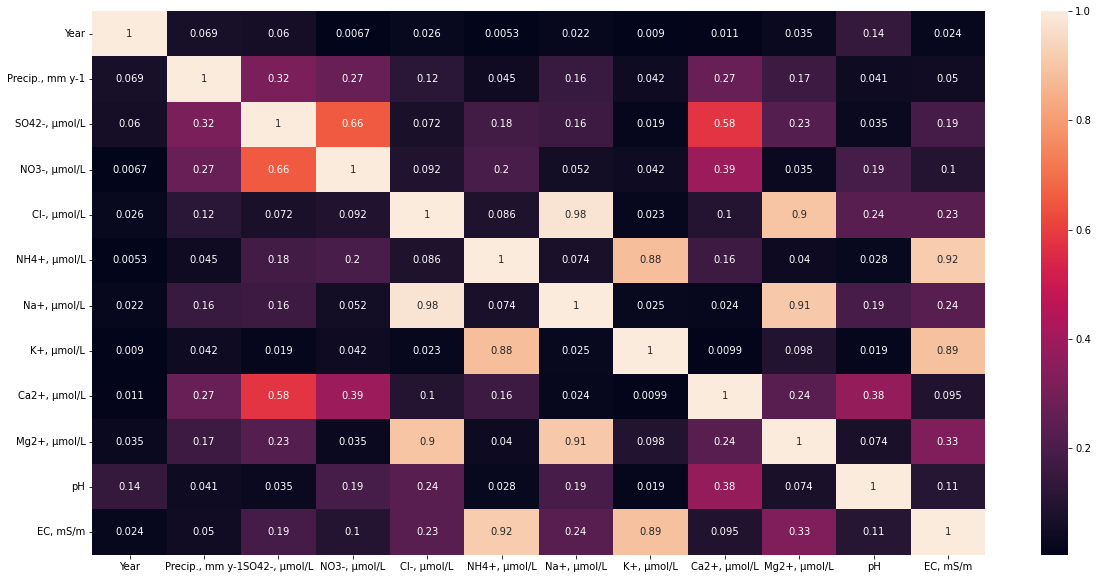

In [89]:
from scipy import stats

plt.figure(figsize=(20, 10))
corr = WD_data.corr()
sns.heatmap(corr.abs(), annot=True)

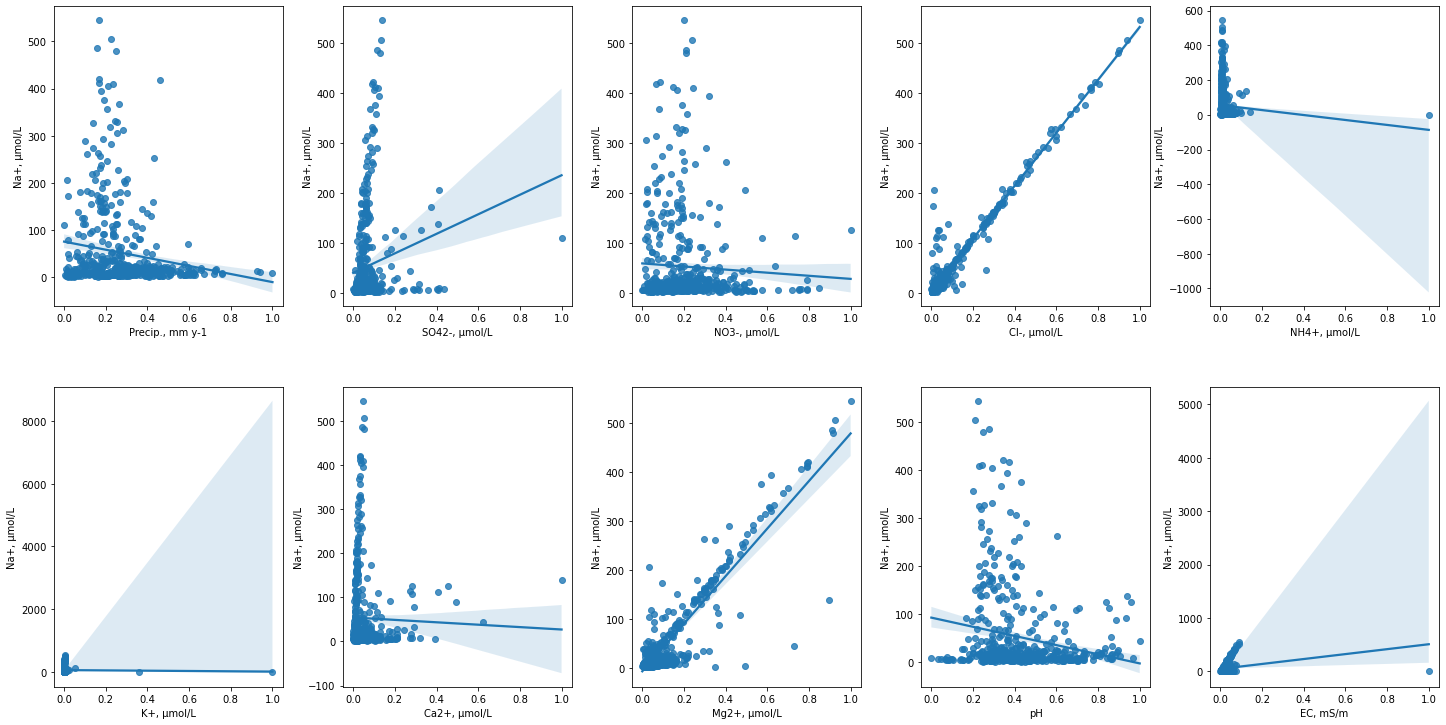

In [90]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

column_sels = ['Precip., mm y-1', 'SO42-, µmol/L', 'NO3-, µmol/L', 'Cl-, µmol/L', 'NH4+, µmol/L', 'K+, µmol/L', 'Ca2+, µmol/L', 'Mg2+, µmol/L', 'pH', 'EC, mS/m']
x = WD_data.loc[:,column_sels]
y = WD_data['Na+, µmol/L']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [91]:
WD_data.drop('Year', axis=1, inplace=True)
WD_data.drop('Precip., mm y-1', axis=1, inplace=True)
WD_data.drop('SO42-, µmol/L', axis=1, inplace=True)
WD_data.drop('NO3-, µmol/L', axis=1, inplace=True)
WD_data.drop('NH4+, µmol/L', axis=1, inplace=True)
WD_data.drop('K+, µmol/L', axis=1, inplace=True)
WD_data.drop('Ca2+, µmol/L', axis=1, inplace=True)
WD_data.drop('pH', axis=1, inplace=True)
WD_data.drop('EC, mS/m', axis=1, inplace=True)
WD_data.shape

(509, 3)

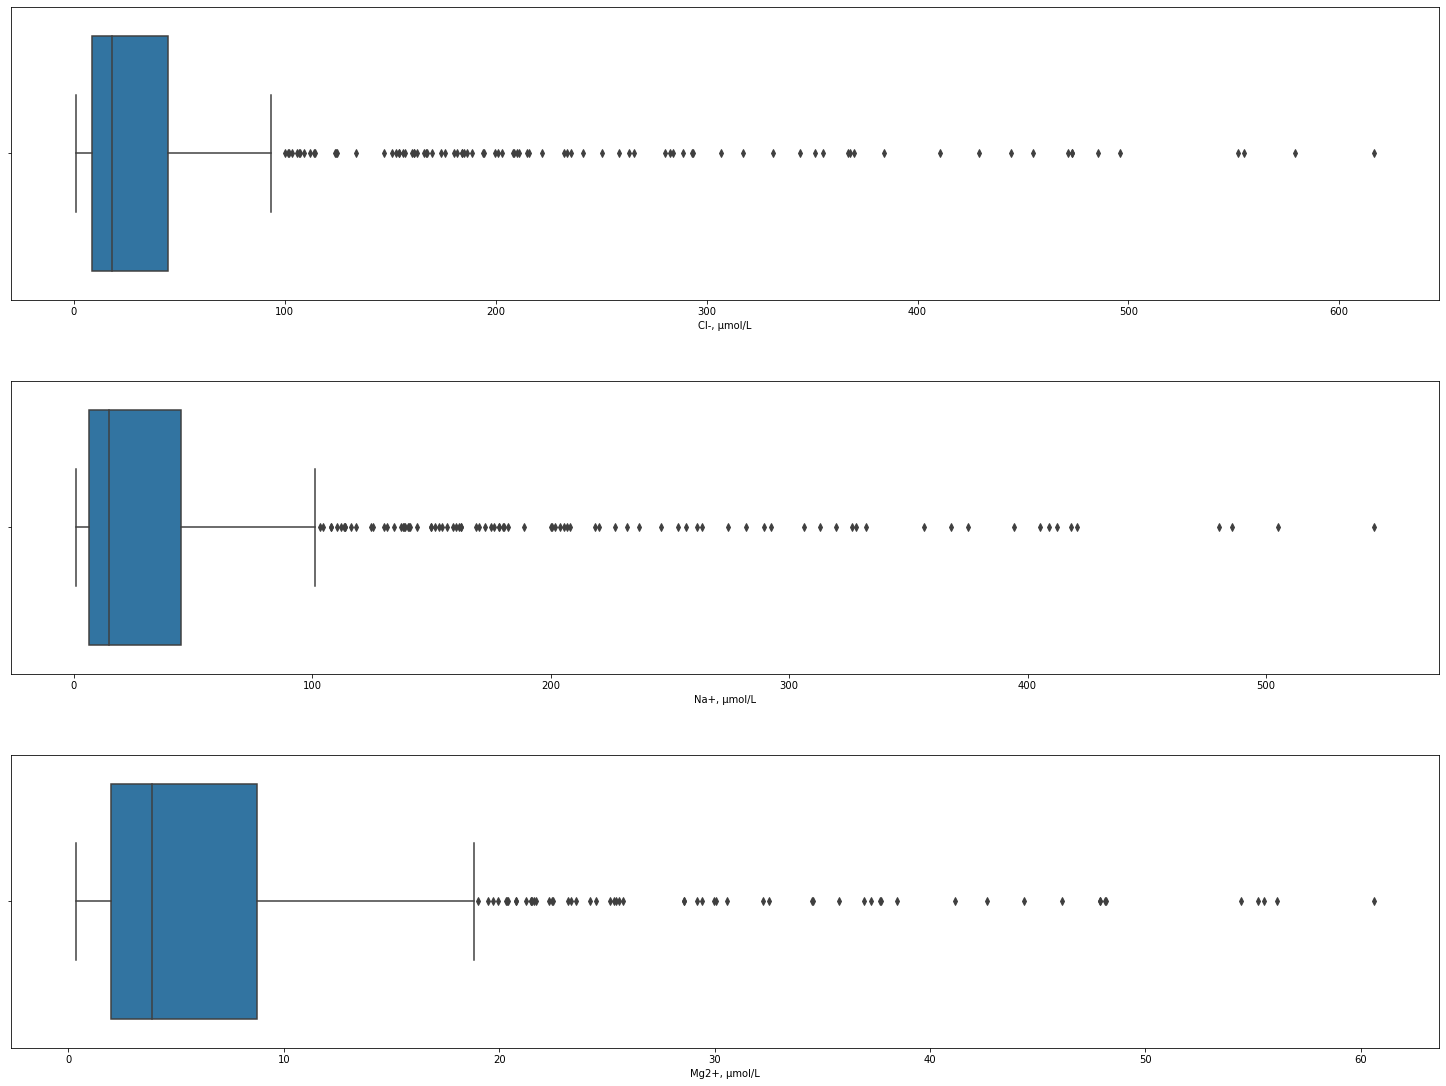

In [92]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in WD_data.items():
    sns.boxplot(x=k, data=WD_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [93]:
WD_data.shape

(509, 3)

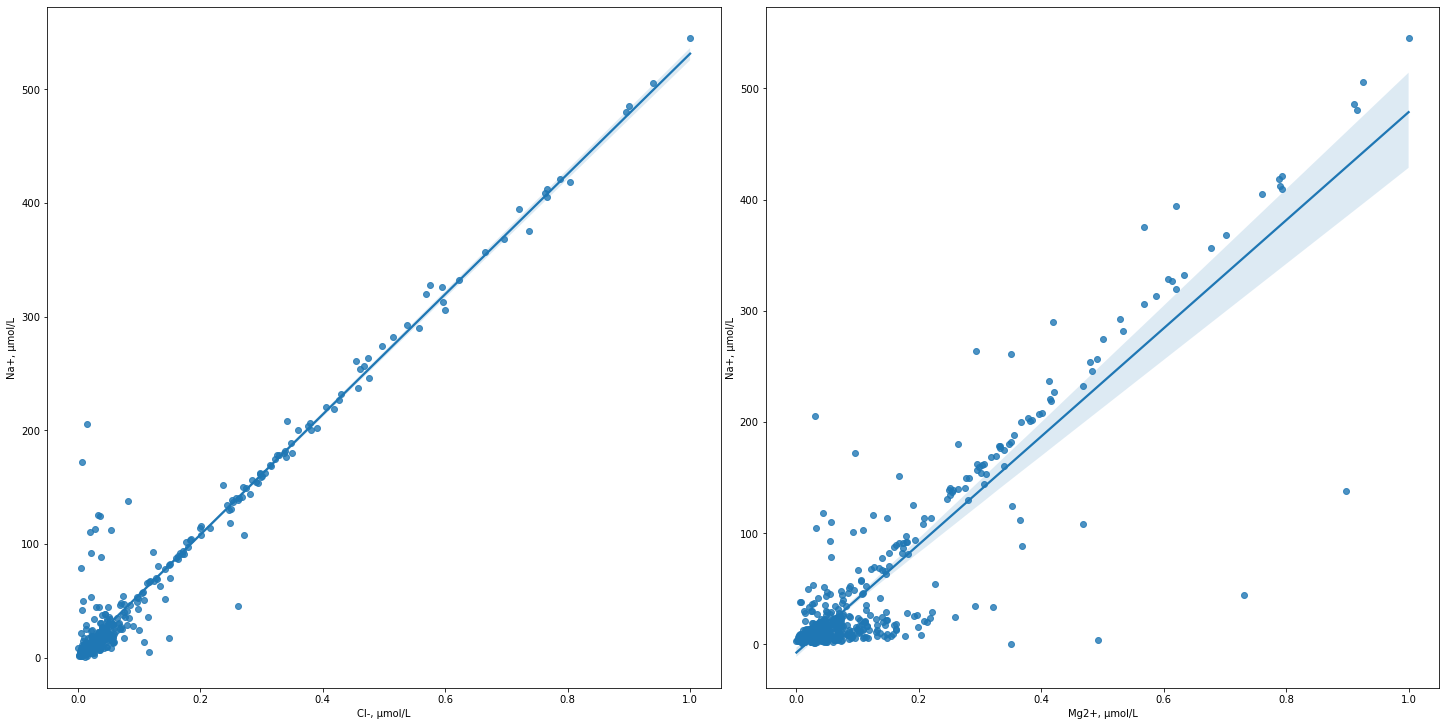

In [94]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

column_sels = ['Cl-, µmol/L', 'Mg2+, µmol/L']
x = WD_data.loc[:,column_sels]
y = WD_data['Na+, µmol/L']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Part 2: Multiple Linear Regression

1. Define the Independent and Dependent Variable

In [95]:
# Cl- and Na+
X = WD_data.iloc[:, -3].values.reshape(-1,1)
y = WD_data.iloc[:, -2].values

2. Splitting the dataset into train and test set

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 1)

In [97]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(509, 1) (509,)
(407, 1) (407,)
(102, 1) (102,)
(102, 1) (102,)


In [98]:
def linear_function(theta, x):
    return theta[0] + theta[1] * x

def plot_function(theta, X, color):
    X_new = [min(X) - 1, max(X) + 1]
    y_new = [linear_function(theta, x) for x in X_new]
    plt.plot(X_new, y_new, linewidth=2, color=color)

def plot_points(X, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(X, y, s=200)
    plt.xlabel("Cl-, µmol/L")
    plt.ylabel("Na+, µmol/L")

In [99]:
def J(h, theta, X_train, y_train):
    m = y.size
    return 1 / (2 * m) * sum((h(theta, X[i][0]) - y[i]) ** 2 for i in range(m))

In [100]:
J(linear_function, [1, 2], X_train, y_train)

9265.764206080645

In [101]:
slider_theta_0 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta0', layout={'width': "auto"})
slider_theta_1 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta1', layout={'width': "auto"})
out = widgets.Output()
button = widgets.Button(width=100, description="Show")

def btn_event_handler(event):
    with out:
        clear_output(wait=True)
        plot_points(X_train, y_train)
        plot_function([slider_theta_0.value, slider_theta_1.value], X_train, 'r')
        plt.show()
        display(Math(rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X_train, y_train):.4f}"))
        
        
with out:
    plot_points(X_train, y_train)
    plt.show()

button.on_click(btn_event_handler)
display(widgets.VBox([slider_theta_0, slider_theta_1, button]))
display(out)

Output()

In [102]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

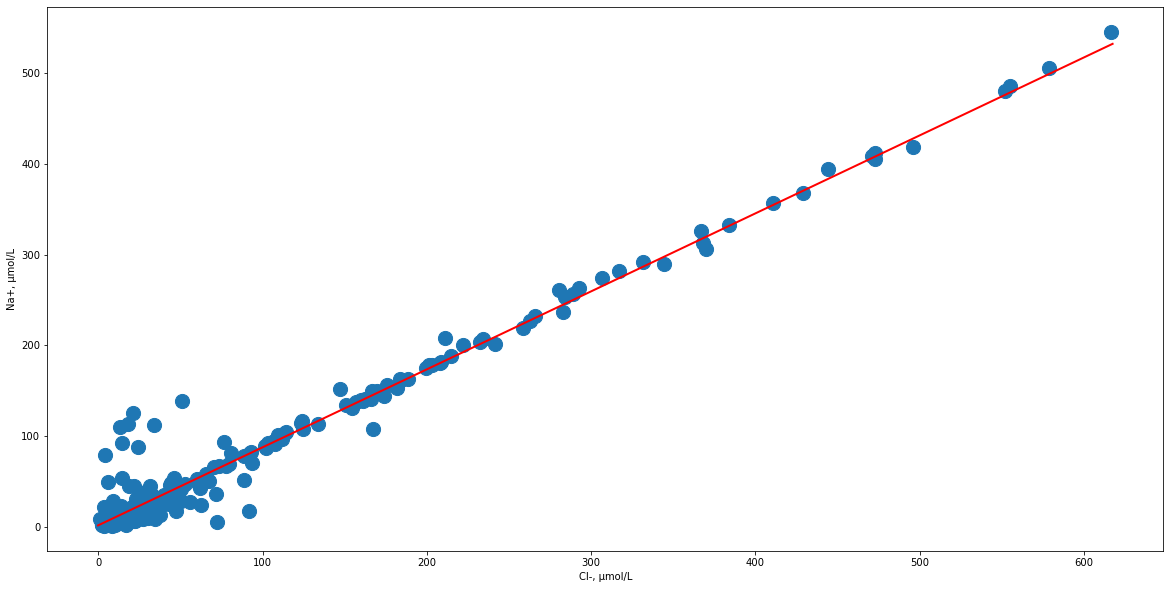

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [103]:
theta = np.concatenate([[model.intercept_], model.coef_])
plot_points(X_train, y_train)
plot_function(theta, X_train, 'r')
plt.show()
display(Math(rf"\Large \theta = {theta.tolist()}"))
display(Math(rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X_train, y_train):.4f}"))

In [104]:
#Retrieving the intercept and regression slope

print('linear model intercept (theta_0): {}'
     .format(model.intercept_))
print('linear model coeff (theta_i):\n{}'
     .format(model.coef_))

linear model intercept (theta_0): 1.7182457533360633
linear model coeff (theta_i):
[0.85910865]


In [105]:
y_pred = model.predict(X_test)
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

compare.head()

,Actual,Predicted
0,5.517152,6.618450
1,138.455660,140.351022
2,110.287223,13.224970
3,4.703827,6.802464
4,505.247136,498.972597


#### Part 3: Model Evaluation

1. Compare the `Actual data` and the `Predicted data`

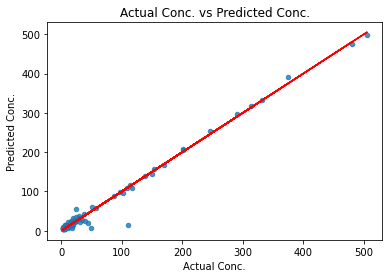

In [106]:
Y_pred = model.predict(X_test)
plt.scatter(y_test, Y_pred, s=20, alpha=.8)
plt.plot(y_test, y_test, 'r-')
plt.xlabel("Actual Conc.")
plt.ylabel("Predicted Conc.")
plt.title("Actual Conc. vs Predicted Conc.")
plt.show()

2. Look at R-squared

In [107]:
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('R-squared score (val): {:.3f}'
     .format(model.score(X_val, y_val)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))

R-squared score (training): 0.972
R-squared score (val): 0.877
R-squared score (test): 0.984


In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

150.85629829299305

In [109]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

12.282357196116429

# Multi-variable

In [116]:
# Na+ vs. Cl- and Mg2+
X = WD_data[['Cl-, µmol/L', 'Mg2+, µmol/L']]
y = WD_data['Na+, µmol/L']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 1)

In [118]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(509, 2) (509,)
(407, 2) (407,)
(102, 2) (102,)
(102, 2) (102,)


In [119]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [120]:
#Retrieving the intercept and regression slope

print('linear model intercept (theta_0): {}'
     .format(model.intercept_))
print('linear model coeff (theta_i):\n{}'
     .format(model.coef_))

linear model intercept (theta_0): -1.7866613123731057
linear model coeff (theta_i):
[0.7341135 1.4048072]


In [121]:
y_pred = model.predict(X_test)
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

compare.head()

,Actual,Predicted
82,5.517152,3.160792
339,138.455660,138.831359
530,110.287223,13.256002
428,4.703827,4.171923
179,505.247136,501.965956


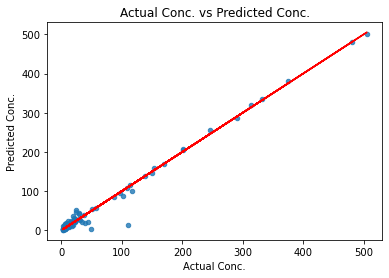

In [122]:
Y_pred = model.predict(X_test)
plt.scatter(y_test, Y_pred, s=20, alpha=.8) 
plt.plot(y_test, y_test, 'r-')
plt.xlabel("Actual Conc.")
plt.ylabel("Predicted Conc.")
plt.title("Actual Conc. vs Predicted Conc.")
plt.show()

In [123]:
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('R-squared score (val): {:.3f}'
     .format(model.score(X_val, y_val)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))

R-squared score (training): 0.975
R-squared score (val): 0.888
R-squared score (test): 0.983


In [124]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

159.5973188185093

In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

12.633183241705524

K-Fold Cross Validation

In [126]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(X,y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    print(X_train.shape, X_test.shape)

(407, 2) (102, 2)
(407, 2) (102, 2)
(407, 2) (102, 2)
(407, 2) (102, 2)
(408, 2) (101, 2)


In [127]:
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))

R-squared score (training): 0.967
R-squared score (test): 0.916


##### Conclusion

Based on the computed R-squared, MSE and RMSE, the linear regression generated using Chloride ion (Cl-) concentration alone is slightly better for predicting Sodium ion (Na+) concentration than using Chloride ion (Cl-) and Magnesium ion (Mg2+) concentrations. The generated linear regression explains about 98.4% of the variability.